In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../Datasets/AI-ML-Project-3-Retail/train_data.csv')

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Exploratory Data Analysis (EDA) and Linear Regression:

In [3]:
data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


###  1. Transform the variables by using data manipulation techniques like, One-Hot Encoding 

In [5]:
data['StateHoliday'].value_counts()

0    886058
0     65536
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

data['StateHoliday']=data['StateHoliday'].replace(to_replace=0,value='0')
data['StateHoliday'] = LabelEncoder().fit_transform(data['StateHoliday'])

### 2. Perform an EDA (Exploratory Data Analysis) to see the impact of variables over Sales.

<AxesSubplot:>

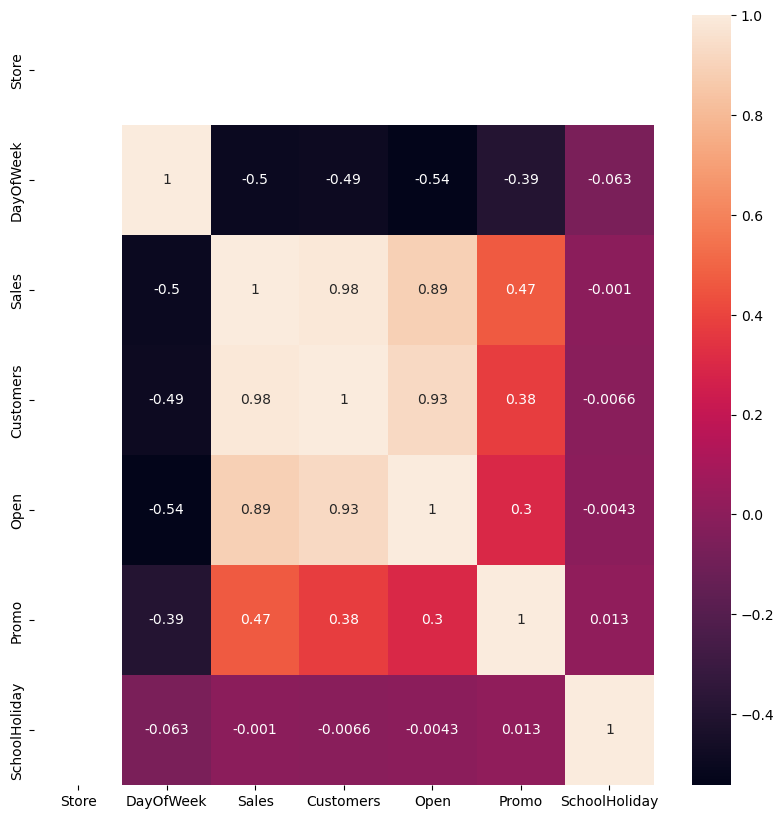

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.loc[data['Store']==1].select_dtypes('int64').corr(),annot=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  int32 
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int32(1), int64(7), object(1)
memory usage: 63.7+ MB


In [9]:
data.drop(columns=['Date'],inplace=True,axis=1)

### 3. Apply Linear Regression to predict the forecast and evaluate different accuracy metrices like RMSE (Root Mean Squared Error) and MAE(Mean Absolute Error) and determine which metric makes more sense.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

LinReg = LinearRegression()
evolution_matrix  = pd.DataFrame(columns=['mean_absolute_error','mean_squared_error'])

#### *Train a single model for all stores, using storeId as a feature.

In [11]:
data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday','Store']]
data_target = data[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

LinReg.fit(X_train,y_train)
y_preds = LinReg.predict(X_test)

mean_abs_err = mean_absolute_error(y_test,y_preds)
mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}
evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

In [12]:
display(evolution_matrix)

,mean_absolute_error,mean_squared_error
0,977.443152,1471.733793


#### * Train separate model for each store.

In [13]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

for i in data['Store'].unique():
    data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']].loc[(data['Store']== i)]
    data_target = data[['Sales']].loc[(data['Store'])==i]

    X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

    LinReg.fit(X_train,y_train)
    y_preds = LinReg.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test,y_preds)
    mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))
    
    matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}    
    evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

In [14]:
evolution_matrix.head()

,mean_absolute_error,mean_squared_error
0,197.849176,272.433600
1,311.187304,533.268312
2,376.751157,537.740070
3,294.330022,416.786191
4,340.565037,462.849478


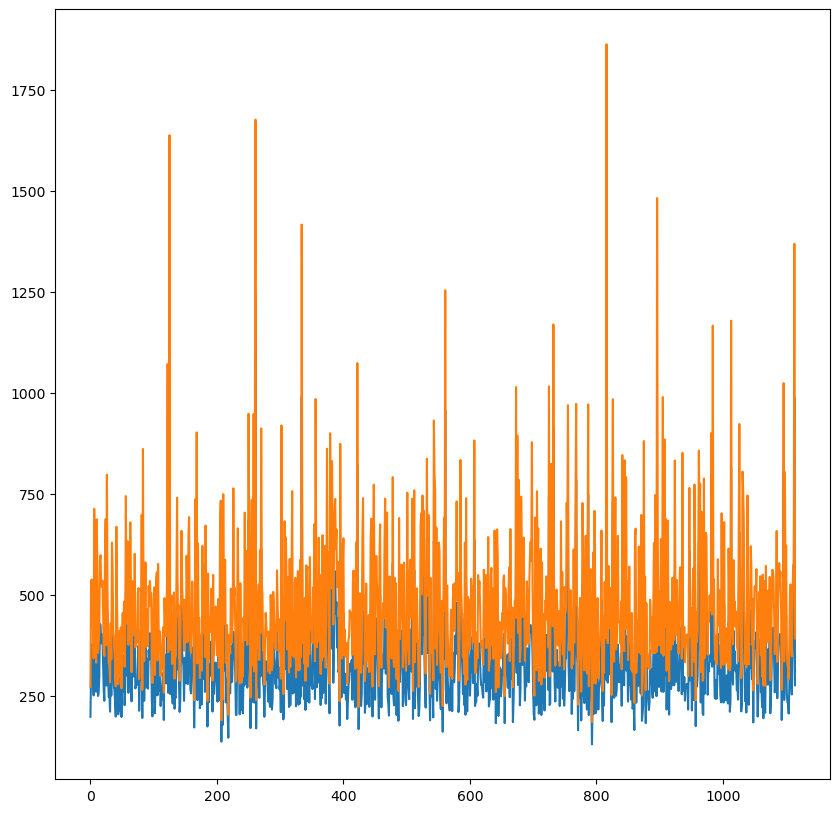

In [15]:
plt.figure(figsize=(10,10))
plt.plot(evolution_matrix)
plt.show()

In [16]:
print('Mean: ' , evolution_matrix['mean_squared_error'].mean(), '  Std: ', evolution_matrix['mean_squared_error'].std())

Mean:  473.23344090242074   Std:  175.14164387737486


In [17]:
print('Mean: ' , evolution_matrix['mean_absolute_error'].mean(), '  Std: ', evolution_matrix['mean_absolute_error'].std())

Mean:  336.75929519375376   Std:  117.34922190648344


#### * Which performs better and Why? [In the first case, parameters are shared and not very free but not in second case]

##### We can simply conclude the model which got all features for seperate stores has less mean squared error compaired to thoes models, which had all the features for all the stores included. Cause where the model is trained for each stores has its paremeters free, not shared like other models. But even though the model with seperate stores had less error but is not performed optimally the error values are not even close to optimal. The linear model is not a perfect fit for this kind of problem.

#### * Try Ensemble of b) and c). What are the findings?

##### Training for all stores

In [18]:
from xgboost import XGBRegressor
xgbModel = XGBRegressor()

data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']]
data_target = data[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)


evolution_matrix.drop(evolution_matrix.index,inplace=True)

xgbModel.fit(X_train,y_train)
y_preds = xgbModel.predict(X_test)

mean_abs_err = mean_absolute_error(y_test,y_preds)
mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}
evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

##### Training for all store individually

In [19]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

for i in data['Store'].unique():
    data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']].loc[(data['Store']== i)]
    data_target = data[['Sales']].loc[(data['Store'])==i]

    X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

    xgbModel.fit(X_train,y_train)
    y_preds = xgbModel.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test,y_preds)
    mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

    matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}    
    evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)


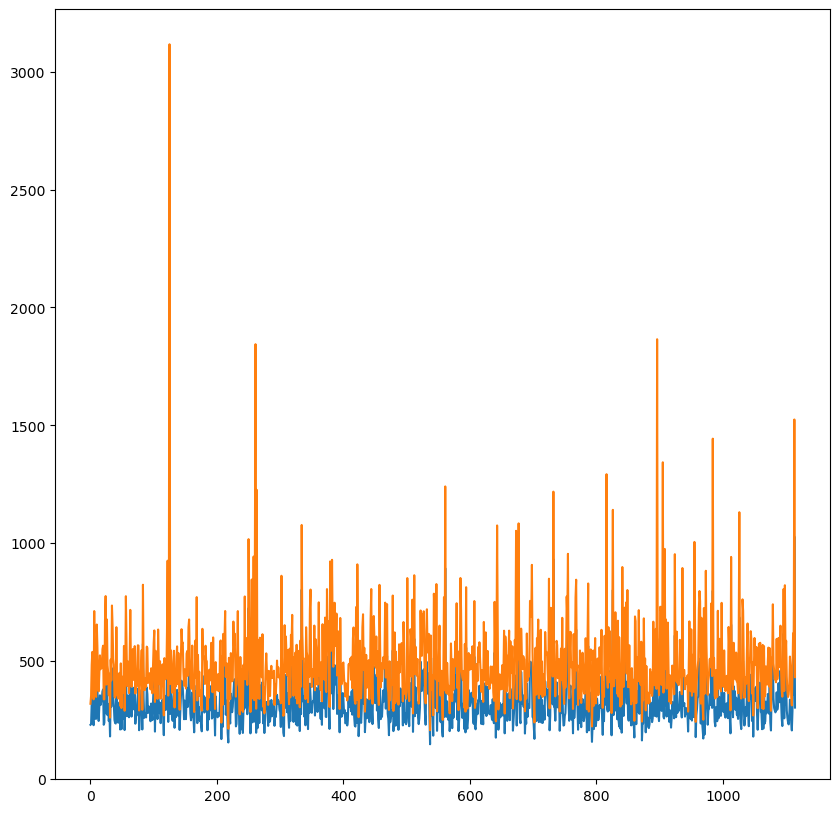

In [20]:
plt.figure(figsize=(10,10))
plt.plot(evolution_matrix)
plt.show()

In [21]:
print('Mean: ' , evolution_matrix['mean_squared_error'].mean(), '  Std: ', evolution_matrix['mean_squared_error'].std())

Mean:  489.8039178219988   Std:  185.44468643093805


In [22]:
print('Mean: ' , evolution_matrix['mean_absolute_error'].mean(), '  Std: ', evolution_matrix['mean_absolute_error'].std())

Mean:  328.0692703726868   Std:  106.7125091397605


#### * Use Regularized Regression. It should perform better in an unseen test set. Any insights?

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [24]:
data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']]
data_target = data[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)


evolution_matrix.drop(evolution_matrix.index,inplace=True)

lasso.fit(X_train,y_train)
y_preds = lasso.predict(X_test)

mean_abs_err = mean_absolute_error(y_test,y_preds)
mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}
evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

In [25]:
evolution_matrix

,mean_absolute_error,mean_squared_error
0,976.811813,1471.743165


In [26]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

for i in data['Store'].unique():
    data_feature = data[['Store','DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']].loc[(data['Store']== i)]
    data_target = data[['Sales']].loc[(data['Store'])==i]

    X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

    lasso.fit(X_train,y_train)
    y_preds = lasso.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test,y_preds)
    mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

    matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}    
    evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)


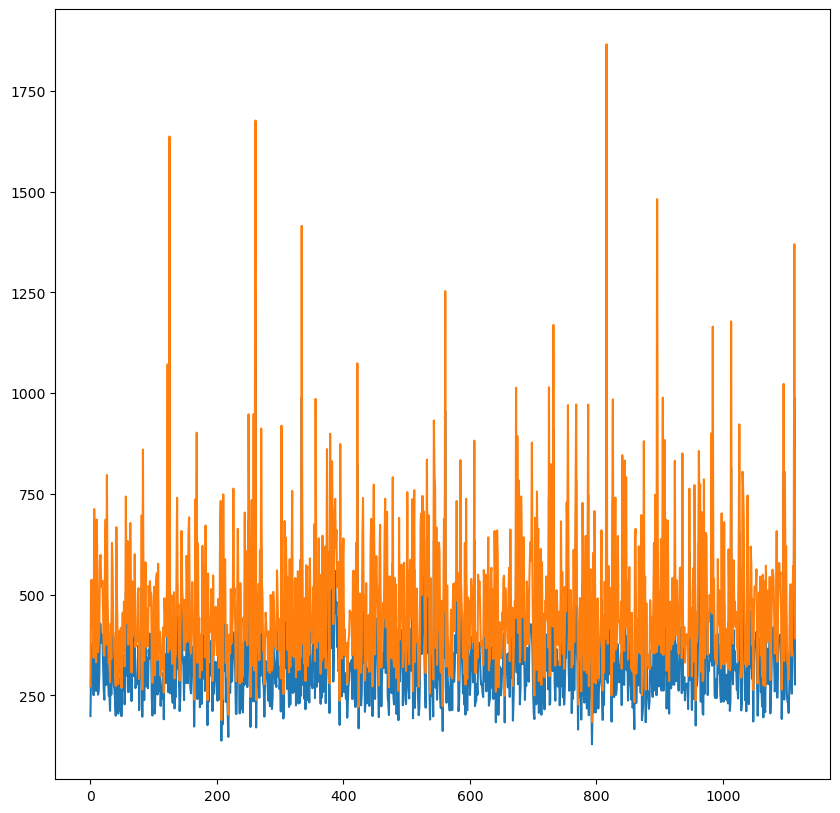

In [27]:
plt.figure(figsize=(10,10))
plt.plot(evolution_matrix)
plt.show()

In [28]:
print('Mean: ' , evolution_matrix['mean_squared_error'].mean(), '  Std: ', evolution_matrix['mean_squared_error'].std())

Mean:  473.13194168056685   Std:  175.2144601365505


In [29]:
print('Mean: ' , evolution_matrix['mean_absolute_error'].mean(), '  Std: ', evolution_matrix['mean_absolute_error'].std())

Mean:  337.57364551337866   Std:  117.2137024201653


### Other Regression Techniques:

#### 4. When store is closed, sales = 0. Can this insight be used for Data Cleaning? Perform this and retrain the model. Any benefits of this step?

In [30]:
data_new = data[['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','Store','Sales']].loc[(data['Open']==1)]

In [31]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

data_feature = data_new[['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','Store']]
data_target = data_new[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

LinReg.fit(X_train,y_train)
y_preds = LinReg.predict(X_test)

mean_abs_err = mean_absolute_error(y_test,y_preds)
mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}
evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

In [32]:
evolution_matrix

,mean_absolute_error,mean_squared_error
0,1153.265365,1618.544799


In [33]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

for i in data['Store'].unique():
    data_feature = data_new[['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday']].loc[(data['Store']== i)]
    data_target = data_new[['Sales']].loc[(data['Store'])==i]

    X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

    lasso.fit(X_train,y_train)
    y_preds = lasso.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test,y_preds)
    mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

    matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}    
    evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

In [34]:
print('Mean: ' , evolution_matrix['mean_squared_error'].mean(), '  Std: ', evolution_matrix['mean_squared_error'].std())

Mean:  506.64997082068504   Std:  185.3449684284122


In [35]:
print('Mean: ' , evolution_matrix['mean_absolute_error'].mean(), '  Std: ', evolution_matrix['mean_absolute_error'].std())

Mean:  380.99105101439636   Std:  124.20390532445154


### * Use Non-Linear Regressors like Random Forest or other Tree-based Regressors.


#### *Train a single model for all stores, where storeId can be a feature.

In [36]:
from sklearn.ensemble import RandomForestRegressor
RandForestReg = RandomForestRegressor()

data_feature = data_new[['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday','Store']]
data_target = data_new[['Sales']]

X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

evolution_matrix.drop(evolution_matrix.index,inplace=True)

RandForestReg.fit(X_train,y_train)
y_preds = RandForestReg.predict(X_test)

mean_abs_err = mean_absolute_error(y_test,y_preds)
mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}
evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


#### * Train separate models for each store.

In [37]:
evolution_matrix.drop(evolution_matrix.index,inplace=True)

for i in data['Store'].unique():
    data_feature = data_new[['Store','DayOfWeek','Customers','Promo','StateHoliday','SchoolHoliday']].loc[(data['Store']== i)]
    data_target = data_new[['Sales']].loc[(data['Store'])==i]

    X_train,X_test,y_train,y_test = train_test_split(data_feature,data_target,train_size=0.7,random_state=42)

    RandForestReg.fit(X_train,y_train)
    y_preds = RandForestReg.predict(X_test)

    mean_abs_err = mean_absolute_error(y_test,y_preds)
    mean_sqr_root_err = np.sqrt(mean_squared_error(y_test,y_preds))

    matrix = {'mean_absolute_error':mean_abs_err,'mean_squared_error':mean_sqr_root_err}    
    evolution_matrix=evolution_matrix.append(matrix,ignore_index=True)

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == "__main__":
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please

In [38]:
print('Mean: ' , evolution_matrix['mean_squared_error'].mean(), '  Std: ', evolution_matrix['mean_squared_error'].std())

Mean:  500.3829400563977   Std:  183.57097016259095


In [39]:
print('Mean: ' , evolution_matrix['mean_absolute_error'].mean(), '  Std: ', evolution_matrix['mean_absolute_error'].std())

Mean:  365.518404690359   Std:  111.11694275796548


### 6. Compare the performance of Linear Model and Non-Linear Model from the previous observations. Which performs better and why?

### 7. Train a Time-series model on the data taking time as the only feature. This will be a store-level training.

In [40]:
data = pd.read_csv('../../Datasets/AI-ML-Project-3-Retail/train_data.csv')

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
data_timeseries = data.copy()

In [42]:
#data_timeseries.drop(data_timeseries.loc[data_timeseries['Open']==0].index , axis=0,inplace=True)

In [43]:
data_timeseries.sort_values(by="Date",ascending=True,inplace=True)

In [44]:
data_timeseries.loc[data_timeseries['Store']==1]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
981530,1,2,2013-01-01,0,0,0,0,a,1
980415,1,3,2013-01-02,5530,668,1,0,0,1
979300,1,4,2013-01-03,4327,578,1,0,0,1
978185,1,5,2013-01-04,4486,619,1,0,0,1
977070,1,6,2013-01-05,4997,635,1,0,0,1
...,...,...,...,...,...,...,...,...,...
4460,1,5,2015-06-26,3317,420,1,0,0,0
3345,1,6,2015-06-27,4019,463,1,0,0,0
2230,1,7,2015-06-28,0,0,0,0,0,0
1115,1,1,2015-06-29,5197,541,1,1,0,0


In [45]:
data_by_store = pd.DataFrame()

In [46]:
date_by_store  = {'Date': data_timeseries['Date'].loc[data_timeseries.loc[data_timeseries['Store']==1].index].values}
d1 = pd.DataFrame(date_by_store)
data_by_store = pd.concat([data_by_store,d1],axis=1)

for i in data_timeseries['Store'].unique(): 
    sales_by_store = {'Sales_' + str(i) :  data_timeseries['Sales'].loc[(data_timeseries['Store']==i)].values}
    d2 = pd.DataFrame(sales_by_store)
    data_by_store = pd.concat([data_by_store,d2],axis=1)

In [47]:
data_store1 = pd.DataFrame()

date_store1  = {'Date': data_timeseries['Date'].loc[data_timeseries.loc[data_timeseries['Store']==1].index].values}
d1 = pd.DataFrame(date_store1)
data_store1 = pd.concat([data_store1,d1],axis=1)

date_sales_store1  = {'Sales': data_timeseries['Sales'].loc[data_timeseries.loc[data_timeseries['Store']==1].index].values}
d2 = pd.DataFrame(date_sales_store1)
data_store1 = pd.concat([data_store1,d2],axis=1)

In [48]:
#data_store1=data_store1.set_index('Date')

In [49]:
data_store1.head()

,Date,Sales
0,2013-01-01,0
1,2013-01-02,5530
2,2013-01-03,4327
3,2013-01-04,4486
4,2013-01-05,4997


In [50]:
data_store1.tail()

,Date,Sales
906,2015-06-26,3317
907,2015-06-27,4019
908,2015-06-28,0
909,2015-06-29,5197
910,2015-06-30,5735


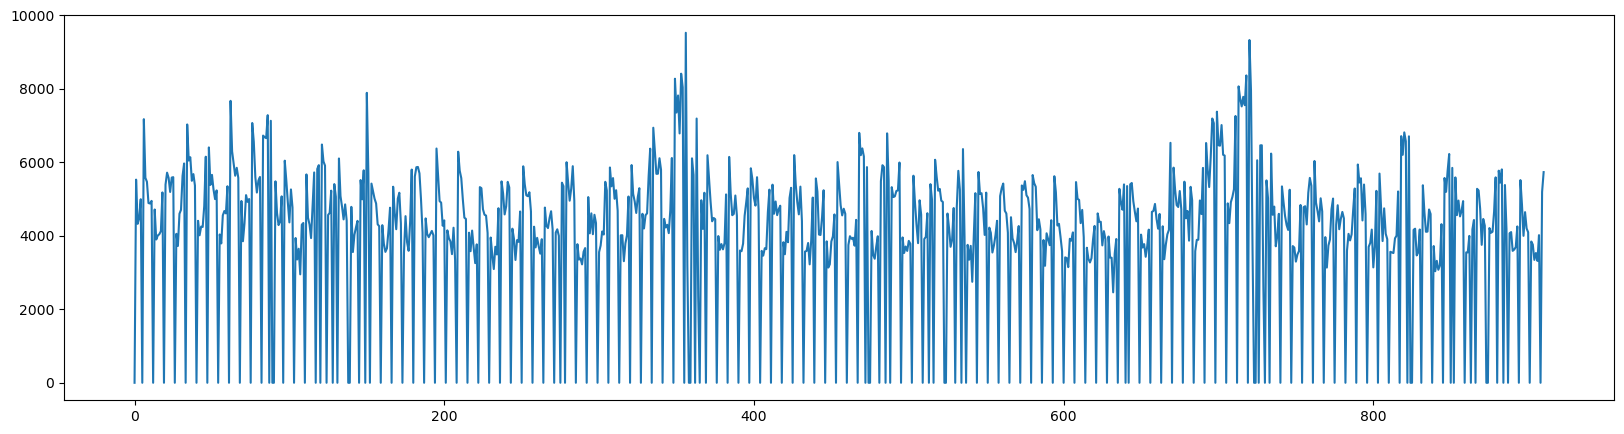

In [51]:
plt.figure(figsize=(20,5))
plt.plot(data_store1['Sales'].dropna())
plt.show()

In [52]:
data_store1['Sales'].value_counts()[0]

157

In [53]:
data_store1['rolling_mean'] = data_store1['Sales'].rolling(window=7).mean()

In [54]:
data_store1

,Date,Sales,rolling_mean
0,2013-01-01,0,NaN
1,2013-01-02,5530,NaN
2,2013-01-03,4327,NaN
3,2013-01-04,4486,NaN
4,2013-01-05,4997,NaN
...,...,...,...
906,2015-06-26,3317,3128.714286
907,2015-06-27,4019,3117.571429
908,2015-06-28,0,3117.571429
909,2015-06-29,5197,3310.571429


In [55]:
for i in data_store1.loc[data_store1['Sales']==0].index:
    data_store1['Sales'].loc[i]=data_store1['rolling_mean'].loc[i]

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [56]:
data_store1.drop('rolling_mean',axis=1)

,Date,Sales
0,2013-01-01,NaN
1,2013-01-02,5530.000000
2,2013-01-03,4327.000000
3,2013-01-04,4486.000000
4,2013-01-05,4997.000000
...,...,...
906,2015-06-26,3317.000000
907,2015-06-27,4019.000000
908,2015-06-28,3117.571429
909,2015-06-29,5197.000000


In [57]:
data_store1.dropna(inplace=True,axis=0)

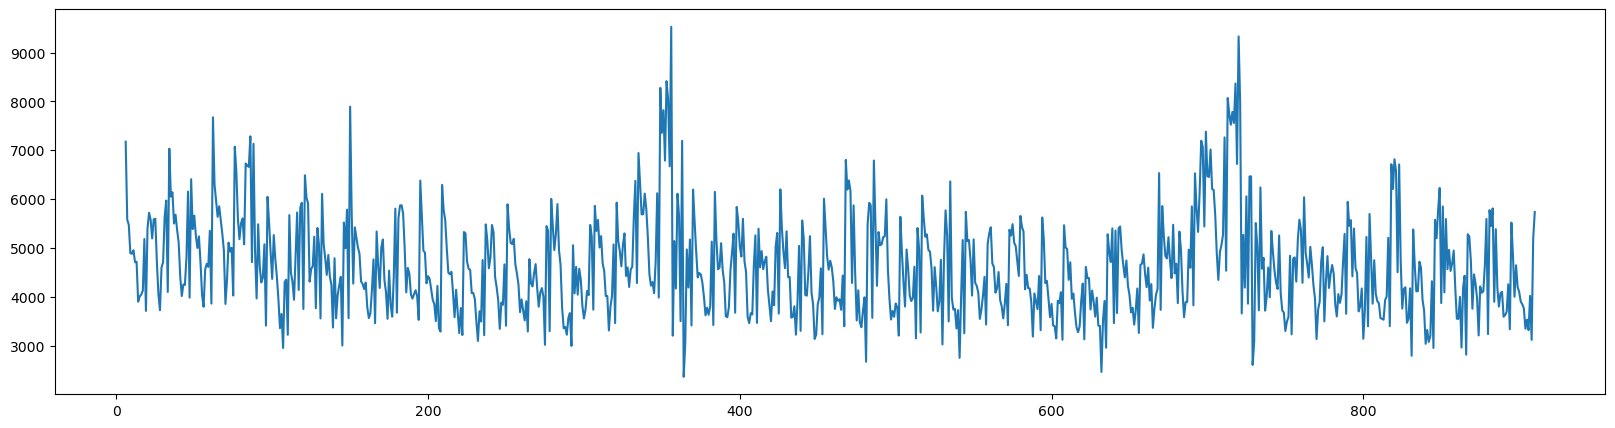

In [58]:
plt.figure(figsize=(20,5))
plt.plot(data_store1['Sales'])

In [59]:
data_store1['Sales_log'] = np.log(data_store1['Sales'])

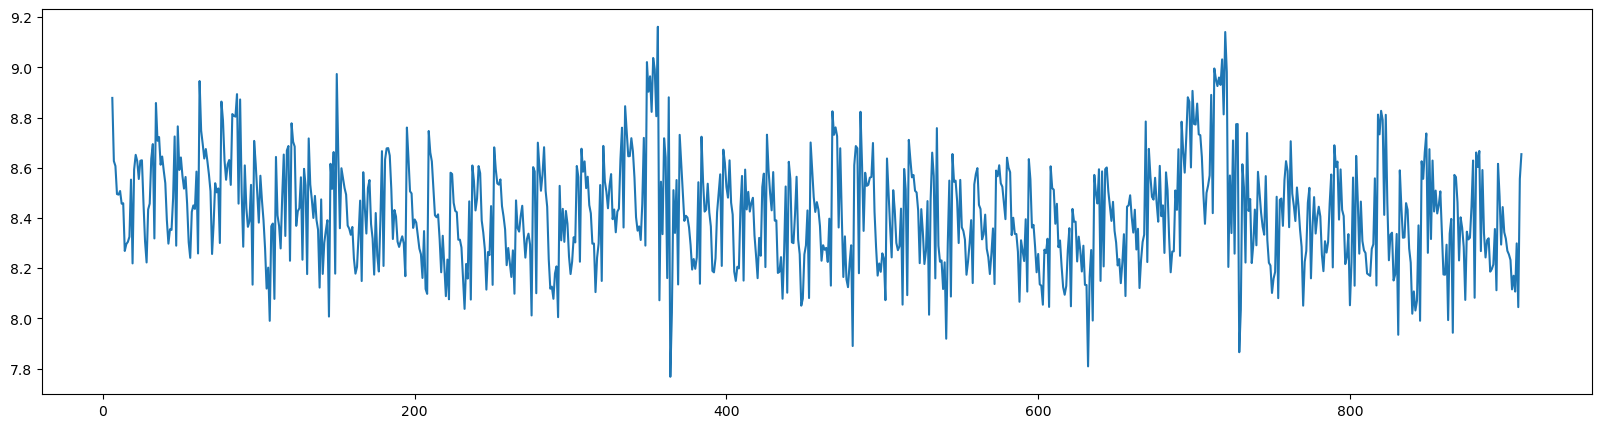

In [60]:
plt.figure(figsize=(20,5))
plt.plot(data_store1['Sales_log'])

In [61]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    movingAvg = timeseries.rolling(window=7).mean()
    movingStd = timeseries.rolling(window=7).std()

    #plot rolling stats.
    plt.plot(timeseries,label= 'Original')
    plt.plot(movingAvg,label='Rolling Avg')
    plt.plot(movingStd,label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Time series Stats')
    plt.show()

    #perform Dickey fuller test
    print('Results: ')
    dickey_Fuller_Test = adfuller(timeseries)
    dftestOutput = pd.Series(dickey_Fuller_Test[0:4],index=['Test Stat','p-value','#Lags Used','Number of Observations used'])
    for key,value in dickey_Fuller_Test[4].items():
        dftestOutput['critical values(%s)' %key] = value
    print(dftestOutput)

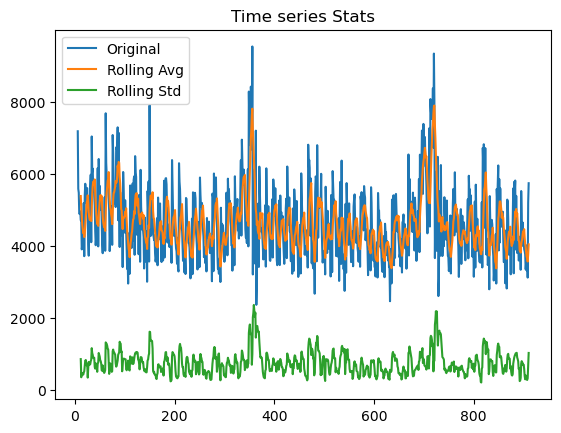

Results: 
Test Stat                       -4.316606
p-value                          0.000416
#Lags Used                      20.000000
Number of Observations used    884.000000
critical values(1%)             -3.437769
critical values(5%)             -2.864815
critical values(10%)            -2.568514
dtype: float64


In [62]:
test_stationarity(data_store1[['Sales']].dropna())

In [63]:
data_store1['Log_diff_1'] = data_store1['Sales_log'] - data_store1['Sales_log'].shift(365)

In [64]:
data_store1

,Date,Sales,rolling_mean,Sales_log,Log_diff_1
6,2013-01-07,7176.000000,3788.000000,8.878497,NaN
7,2013-01-08,5580.000000,4585.142857,8.626944,NaN
8,2013-01-09,5471.000000,4576.714286,8.607217,NaN
9,2013-01-10,4892.000000,4657.428571,8.495356,NaN
10,2013-01-11,4881.000000,4713.857143,8.493105,NaN
...,...,...,...,...,...
906,2015-06-26,3317.000000,3128.714286,8.106816,0.187824
907,2015-06-27,4019.000000,3117.571429,8.298788,0.000000
908,2015-06-28,3117.571429,3117.571429,8.044810,-0.504270
909,2015-06-29,5197.000000,3310.571429,8.555837,0.468855


<AxesSubplot:>

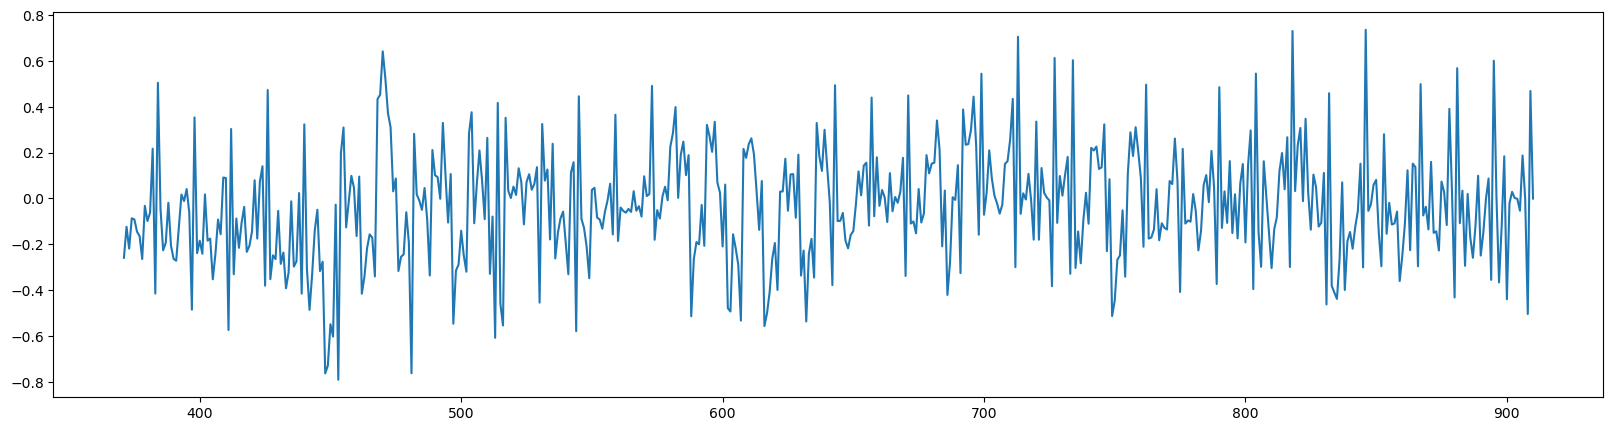

In [65]:
data_store1['Log_diff_1'].dropna().plot(figsize=(20,5))

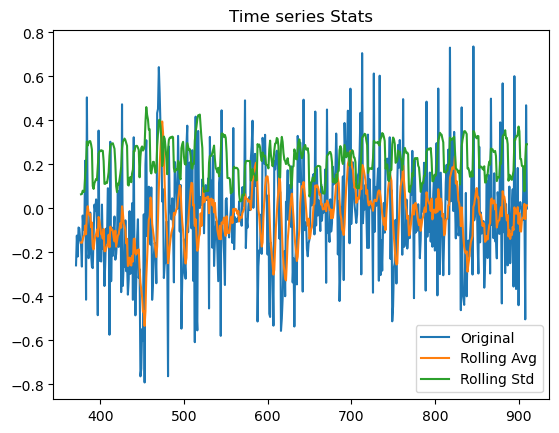

Results: 
Test Stat                       -3.681803
p-value                          0.004377
#Lags Used                      14.000000
Number of Observations used    525.000000
critical values(1%)             -3.442867
critical values(5%)             -2.867061
critical values(10%)            -2.569710
dtype: float64


In [66]:
test_stationarity(data_store1['Log_diff_1'].dropna())

In [67]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

In [68]:
lag_acf  = acf(data_store1['Log_diff_1'].dropna(), nlags=20)
lag_pacf = pacf(data_store1['Log_diff_1'].dropna(), nlags=20,method='ols')

<module 'matplotlib.pyplot' from 'C:\\Users\\monda\\anaconda3\\envs\\Deeplearning_CPU\\lib\\site-packages\\matplotlib\\pyplot.py'>

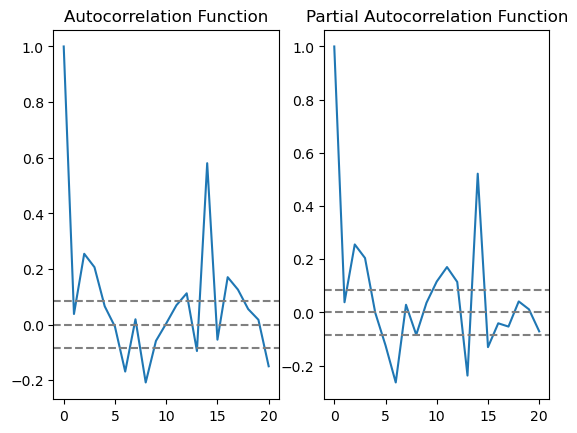

In [69]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_store1['Log_diff_1'].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_store1['Log_diff_1'].dropna())), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            
#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_store1['Log_diff_1'].dropna())), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_store1['Log_diff_1'].dropna())), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt



C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


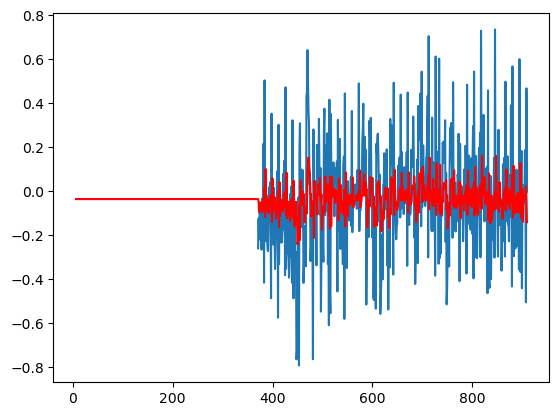

In [70]:
modelARIMA = ARIMA(data_store1['Log_diff_1'],order=(2,0,0)) 
results_AR = modelARIMA.fit()

plt.plot(data_store1['Log_diff_1'].dropna())
plt.plot(results_AR.fittedvalues, color='red')

<AxesSubplot:>

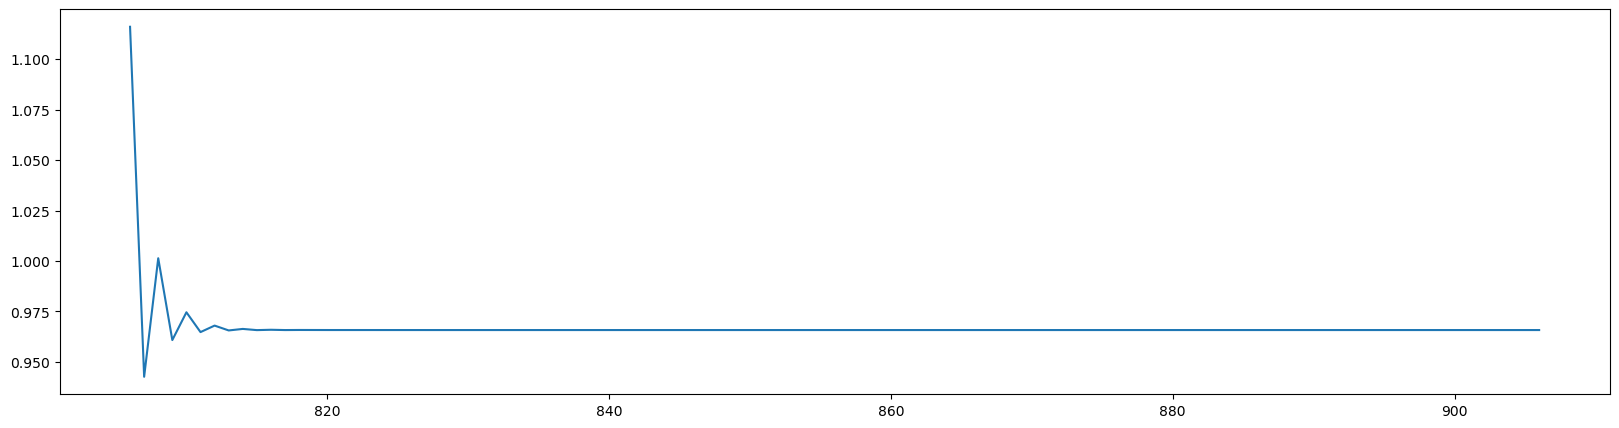

In [71]:
data_store1['ARIMA_forecast'] = results_AR.predict(start=800,end=900,dynamic=True)
np.exp(data_store1['ARIMA_forecast']).plot(figsize=(20,5))

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


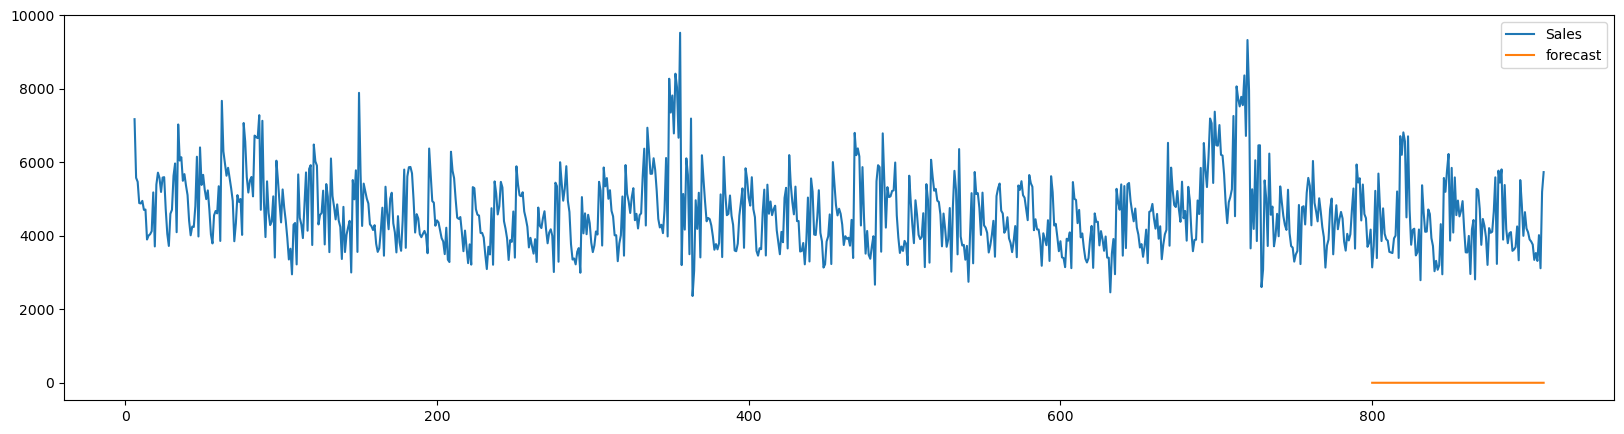

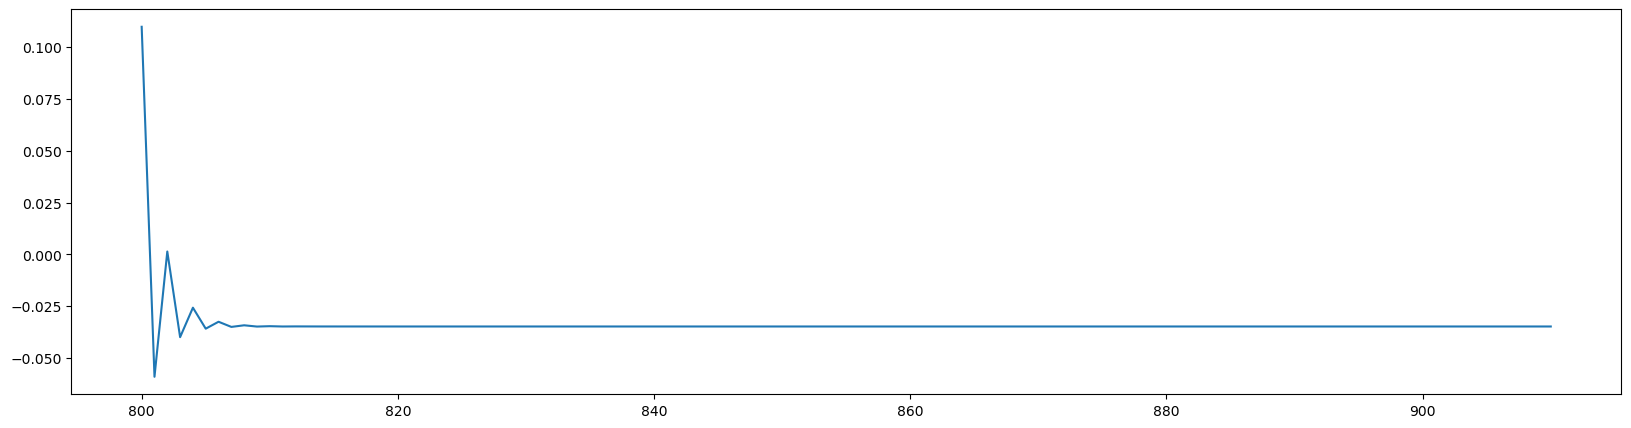

In [72]:
data_store1['forecast'] = results_AR.predict(start=800,end=911,dynamic=True)
data_store1[['Sales','forecast']].plot(figsize=(20,5))
plt.show()
data_store1['forecast'].plot(figsize=(20,5))
plt.show()

# Implementing Neural Networks:

In [73]:
data_store1 = data[['Date','Sales']].loc[data['Store']==1]

<AxesSubplot:>

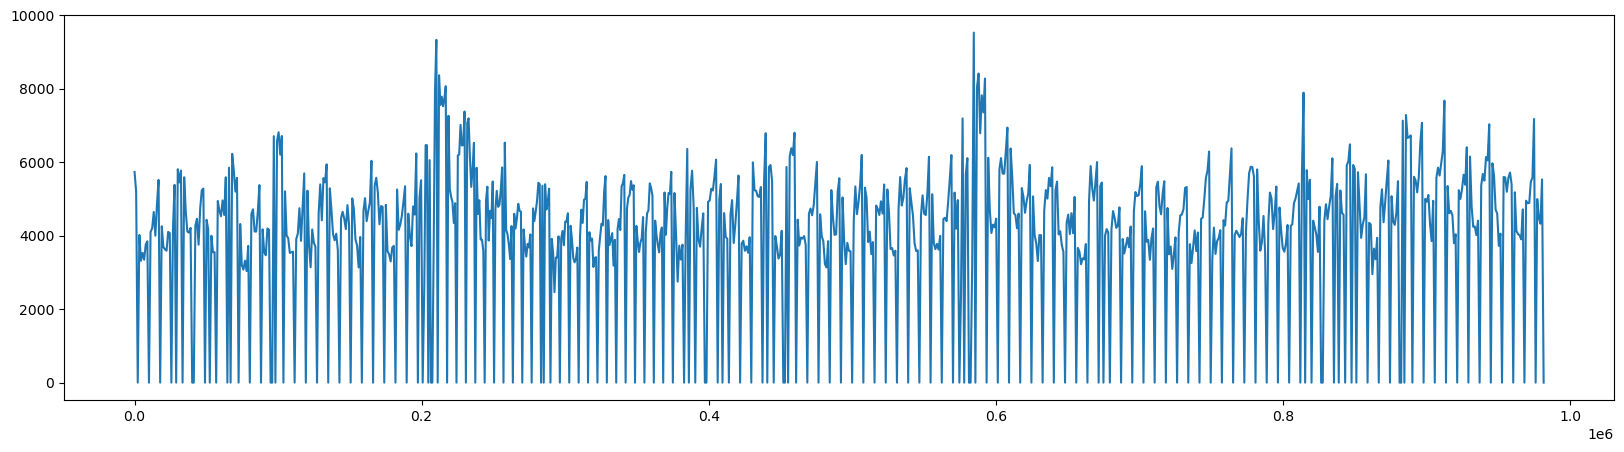

In [74]:
data_store1['Sales'].dropna().plot(figsize=(20,5))

In [75]:
data_store1['rolling_mean'] = data_store1['Sales'].rolling(window=3).mean()

In [76]:
data_store1['Sales'].isna().sum()

0

In [77]:
data_store1.dropna(inplace=True,axis=0)

In [78]:
for i in data_store1.loc[data_store1['Sales']==0].index:
    data_store1['Sales'].loc[i]=data_store1['rolling_mean'].loc[i]

C:\Users\monda\anaconda3\envs\Deeplearning_CPU\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:>

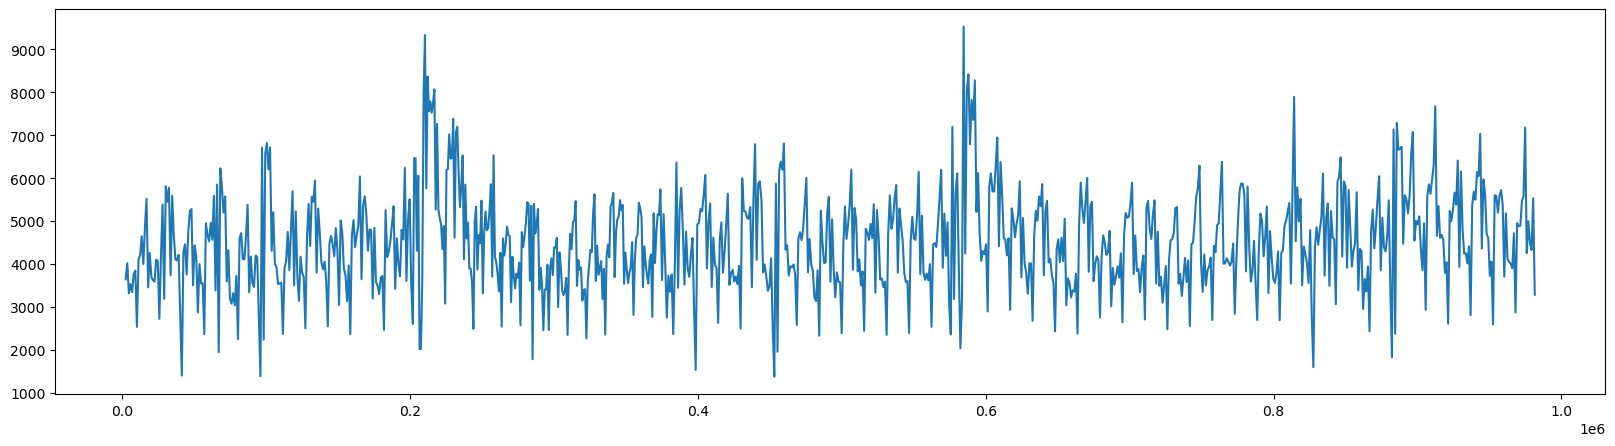

In [79]:
data_store1['Sales'].plot(figsize=(20,5))

In [80]:
def create_timeseries_data(timeseries,previous_lag):
    X = []
    y = []
    prev_data = []
    length = len(timeseries) - (previous_lag - 1)
    for i in range(length):
        for j in range(previous_lag):
            if(j==previous_lag-1):
                X.append(prev_data.copy())
                y.append(timeseries[i+j])
                prev_data.clear()
            else:
                prev_data.append(timeseries[i+j])
    return np.array(X),np.array(y)

In [81]:
previous_lag = 4
X,y = create_timeseries_data(data_store1['Sales'].values,previous_lag)

In [82]:
X.shape,y.shape

((906, 3), (906,))

In [83]:
X = X.reshape(X.shape[0],previous_lag-1,1)

In [84]:
X.shape,y.shape

((906, 3, 1), (906,))

## 1. Train a LSTM on the same set of features and compare the result with traditional time-series model.



In [85]:
from tensorflow.keras import models, layers

In [86]:
model = models.Sequential()
model.add(layers.LSTM(500,return_sequences = True, activation='relu',input_shape=X.shape[1:]))
model.add(layers.LSTM(500,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='ADAM',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 500)            1004000   
                                                                 
 lstm_1 (LSTM)               (None, 500)               2002000   
                                                                 
 dense (Dense)               (None, 1)                 501       
                                                                 
Total params: 3,006,501
Trainable params: 3,006,501
Non-trainable params: 0
_________________________________________________________________


In [87]:
model_hist = model.fit(X,y,epochs=500,verbose=0)

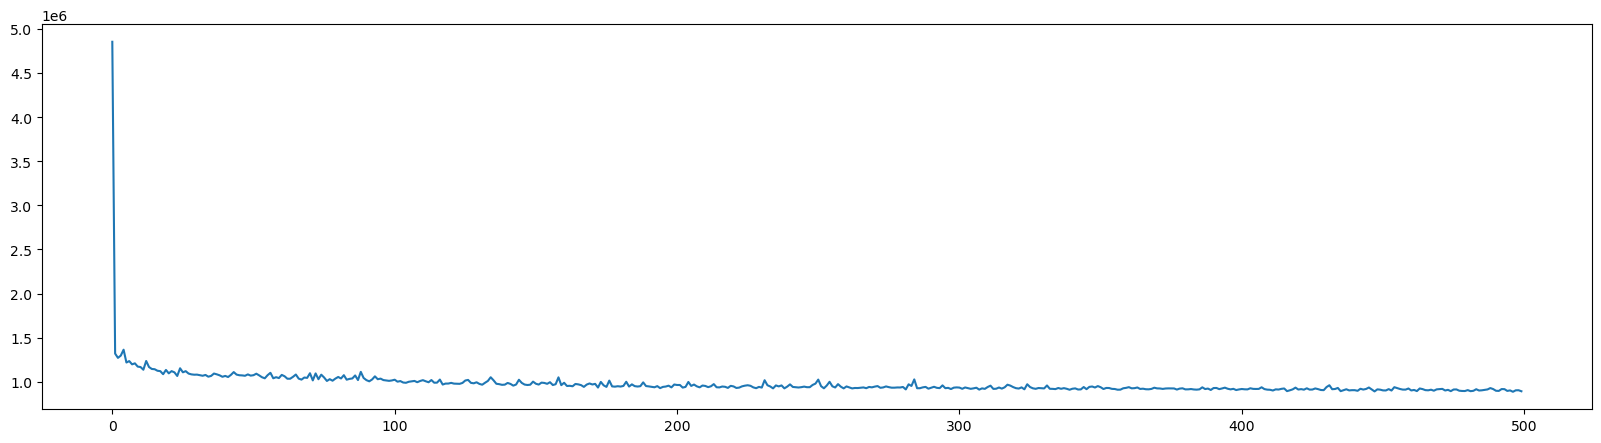

In [88]:
plt.figure(figsize=(20,5))
plt.plot(model_hist.history['loss'])

In [89]:
x_input = X[905]

In [90]:
x_input = x_input.reshape(3,)

In [91]:
for i in range(100):
    x_ip = x_input[i:i+3]
    y_pred = model.predict(x_ip.reshape(1,x_ip.shape[0],1))
    x_input = np.append(x_input,y_pred[0][0])

1/1 [==============================] - 0s 16ms/step


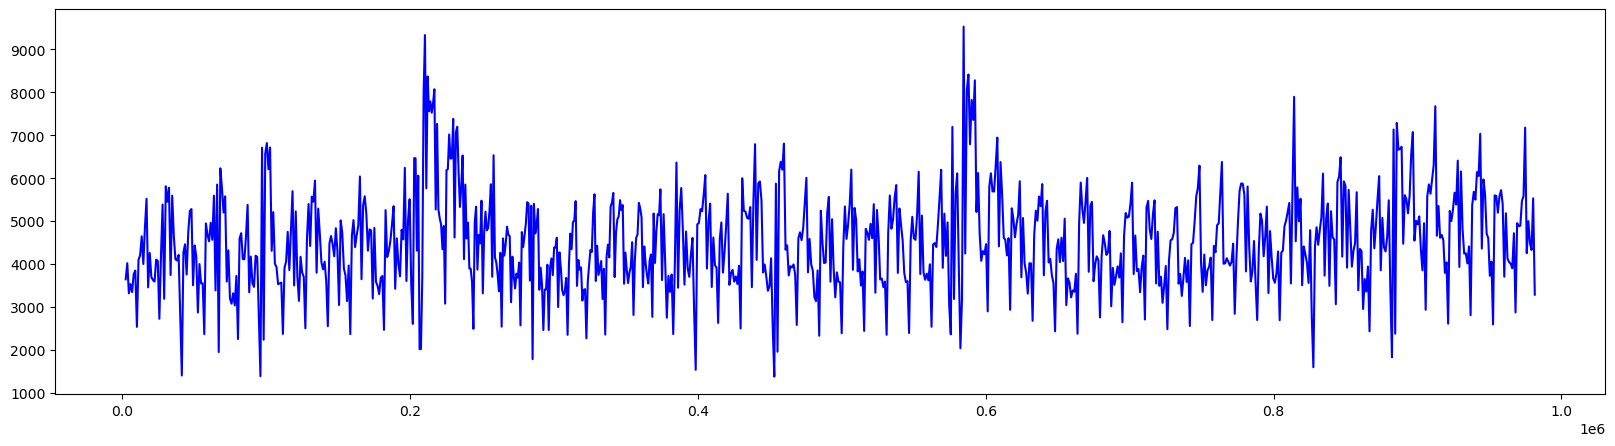

In [92]:
plt.figure(figsize=(20,5))
plt.plot(data_store1['Sales'],color='blue')

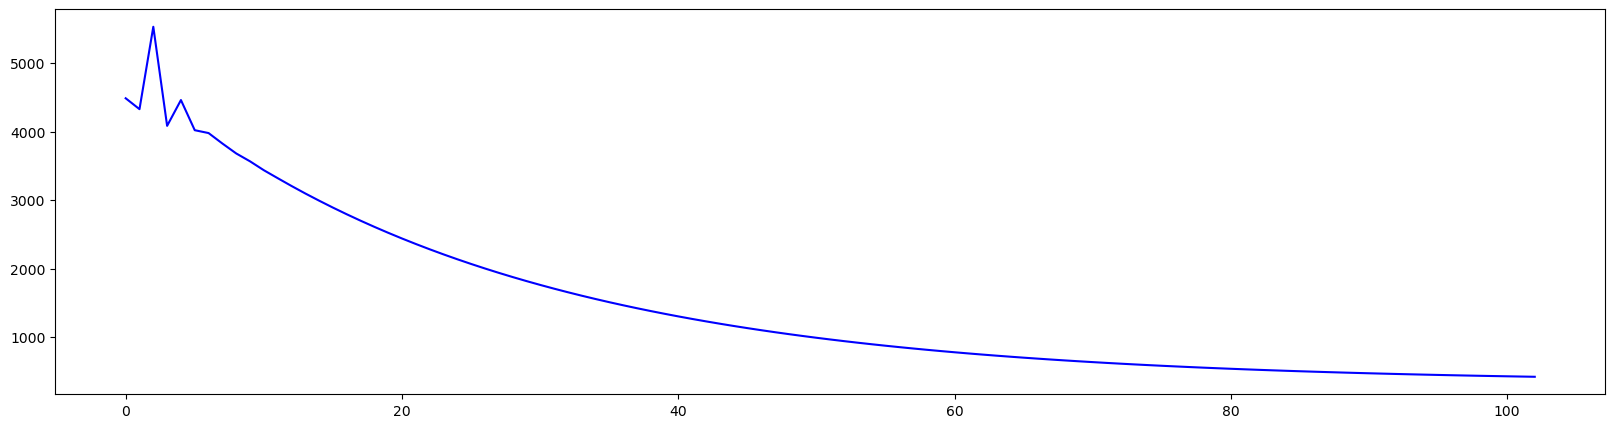

In [93]:
plt.figure(figsize=(20,5))
plt.plot(x_input,color='blue')

## 2. Comment on the behavior of all the models you have built so far

## 3. Cluster stores using sales and customer visits as features. Find out how many clusters or groups are possible. Also visualize the results.

## 4. Is it possible to have separate prediction models for each cluster? Compare results with the previous models.

# Applying ANN:

## 5. Use ANN (Artificial Neural Network) to predict Store Sales.

In [94]:
data_ANN = data.copy()

In [95]:
data_ANN.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,982644.000000,982644.000000,982644,982644.000000,982644.000000,982644.000000,982644.000000,982644,982644.000000
unique,NaN,NaN,911,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-06-30,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,886058,NaN
mean,558.444843,3.998282,NaN,5760.843202,632.770227,0.828585,0.380183,NaN,0.171928
std,321.909907,2.000138,NaN,3857.573443,465.401378,0.376871,0.485432,NaN,0.377318
min,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,280.000000,2.000000,NaN,3705.000000,403.000000,1.000000,0.000000,NaN,0.000000
50%,558.000000,4.000000,NaN,5731.000000,609.000000,1.000000,0.000000,NaN,0.000000
75%,838.000000,6.000000,NaN,7847.000000,838.000000,1.000000,1.000000,NaN,0.000000


In [96]:
date = data_ANN['Date'].values

In [97]:
date_month = []
for i in date:
    date_month.append(int(i.split('-')[1]))

In [98]:
date_month = np.array(date_month)

In [99]:
data_ANN['Month'] = date_month

In [100]:
data_ANN.drop('Date',axis=1,inplace=True)

In [101]:
data_ANN

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month
0,1,2,5735,568,1,1,0,0,6
1,2,2,9863,877,1,1,0,0,6
2,3,2,13261,1072,1,1,0,1,6
3,4,2,13106,1488,1,1,0,0,6
4,5,2,6635,645,1,1,0,0,6
...,...,...,...,...,...,...,...,...,...
982639,1111,2,0,0,0,0,a,1,1
982640,1112,2,0,0,0,0,a,1,1
982641,1113,2,0,0,0,0,a,1,1
982642,1114,2,0,0,0,0,a,1,1


In [102]:
data_ANN.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Month
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928,5.806196
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318,3.376927
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000,3.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000,5.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000,9.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000,12.000000


In [103]:
data_ANN_Target = data_ANN['Sales'].copy()
data_ANN.drop(['Sales','StateHoliday'],inplace=True,axis=1)

In [104]:
data_ANN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Store          982644 non-null  int64
 1   DayOfWeek      982644 non-null  int64
 2   Customers      982644 non-null  int64
 3   Open           982644 non-null  int64
 4   Promo          982644 non-null  int64
 5   SchoolHoliday  982644 non-null  int64
 6   Month          982644 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 48.7 MB


In [105]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data_ANN,data_ANN_Target,test_size=0.8,random_state=42)

## * Fine-tune number of layers,

## * Number of Neurons in each layers.

## * Experiment in batch-size.

In [106]:
from tensorflow.keras import models, layers

In [107]:
X_train.shape

(196528, 7)

## * Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?

## * Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.

## * Which activation performs best for this use case and why?

In [108]:
model_ANN = models.Sequential()
model_ANN.add(layers.Dense(500,activation = 'relu'))
model_ANN.add(layers.Dropout(0.2))

model_ANN.add(layers.Dense(500,activation = 'relu'))
model_ANN.add(layers.Dropout(0.3))

model_ANN.add(layers.Dense(500,activation = 'relu'))
model_ANN.add(layers.Dropout(0.4))

model_ANN.add(layers.Dense(1,activation= 'linear'))

model_ANN.compile(optimizer='ADAM',loss='mse')

In [109]:
model_hist = model_ANN.fit(X_train,y_train,epochs=100,batch_size=256,validation_split=0.2,verbose=0)

## * Check how it performed in the dataset, calculate RMSE.

In [110]:
y_preds = model_ANN.predict(X_test)

24567/24567 [==============================] - 11s 460us/step


In [111]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

acc_score = r2_score(y_test,y_preds)
rmse = sqrt(mean_squared_error(y_test,y_preds))

In [112]:
print("R2 score:",acc_score , " Root mean squared error:" , rmse)

R2 score: 0.8740665898144305  Root mean squared error: 1369.6386163392413


### 6. Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and customer visits). Compare model performance with traditional ML based prediction models.

### 7. Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid search, cross-validation and Random search.